## Librerias

In [1]:
from auxiliares import woe,iv

import cufflinks as cf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings

from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from varclushi import VarClusHi

sns.set()
cf.go_offline()
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Lectura de datos

In [2]:
train=pd.read_csv('~/train_discretizado.csv')
train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target,woe_term,woe_grade,woe_emp_length,woe_home_ownership,woe_verification_status,woe_pymnt_plan,woe_purpose,woe_addr_state,woe_initial_list_status,woe_disc_loan_amnt_4,woe_disc_funded_amnt_4,woe_disc_funded_amnt_inv_4,woe_disc_int_rate_4,woe_disc_installment_4,woe_disc_annual_inc_4,woe_disc_dti_4,woe_disc_open_acc_4,woe_disc_revol_bal_4,woe_disc_revol_util_4,woe_disc_total_acc_4,woe_disc_tot_cur_bal_4,woe_disc_total_rev_hi_lim_4,woe_disc_mths_between_issued_earliest_cr_4,woe_disc_collections_12_mths_ex_med_4,woe_disc_acc_now_delinq_4,woe_disc_tot_coll_amt_4,woe_disc_delinq_2yrs_4,woe_disc_inq_last_6mths_4,woe_disc_pub_rec_4,woe_disc_loan_amnt_5,woe_disc_funded_amnt_5,w

## Selección de variables

In [3]:
vard=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status', ]

vars=[v for v in train.columns if v[:4]=='disc']+vard

um = 'id'

target='target'

### IV

In [4]:
aux=pd.Series({v:iv(train,v,target) for v in vars}).sort_values(ascending=False).reset_index()\
    .rename(columns={'index':'variable',0:'iv'})
best_iv=aux[aux['iv']>0.02]
best_iv.iplot(kind='bar',x='variable',y='iv',title='IV de las variables discretizadas',colors=['blue'])

### $\chi^2$ test

In [5]:
chi=pd.Series(dict(zip(best_iv['variable'],map(lambda x:chi2_contingency(pd.crosstab(train[x],train[target])).statistic,best_iv['variable']))))\
.reset_index().rename(columns={'index':'variable',0:'chi2'})
chi['cramer_V']=np.sqrt(chi['chi2']/train.shape[0])
chi=chi.sort_values('cramer_V',ascending=False)
chi.iplot(kind='bar',x='variable',y='cramer_V',title='Cramer\'s V de las variables discretizadas',colors=['blue'])

In [6]:
# variables con iv>.02 y cramer's V>.05
best=best_iv.merge(chi[chi['cramer_V']>.05],on='variable',how='inner').sort_values(by=['iv','cramer_V'],ascending=[False,False])
best

,variable,iv,chi2,cramer_V
0,disc_int_rate_10,0.321124,9414.127552,0.169830
1,disc_int_rate_9,0.320822,9339.008238,0.169152
2,disc_int_rate_7,0.313641,9240.430063,0.168256
3,disc_int_rate_8,0.307107,9121.561675,0.167171
4,disc_int_rate_6,0.302871,9004.756801,0.166097
5,disc_int_rate_5,0.293599,8672.148962,0.163001
6,grade,0.286678,8803.688343,0.164232
7,disc_int_rate_4,0.282296,8498.482963,0.161360
8,disc_tot_cur_bal_10,0.056532,1742.689547,0.073069
9,disc_total_rev_hi_lim_10,0.055305,1717.147881,0.072532


### correlaciones

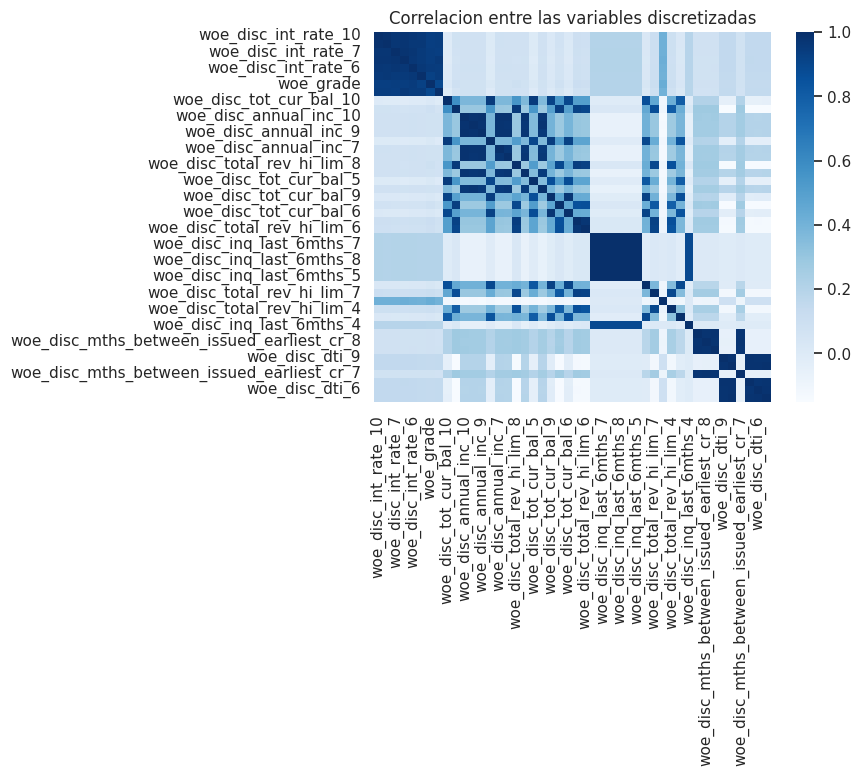

In [7]:
sns.heatmap(train[[f'woe_{var}' for var in best['variable']]].corr(),cmap='Blues')\
    .set_title('Correlacion entre las variables discretizadas')
plt.show()

### Cluster de variables

In [8]:
vc = VarClusHi(df=train,feat_list=[f'woe_{x}' for x in best['variable']]).varclus()

In [9]:
clus=vc.rsquare.sort_values(by=['Cluster','RS_Ratio']).reset_index(drop=True)
clus['Variable']=clus['Variable'].apply(lambda x: x[4:])

In [10]:
best=clus.merge(best,left_on='Variable',right_on='variable',how='inner').drop('variable',axis=1)\
    .sort_values(by=['Cluster','iv','cramer_V'],ascending=[True,False,False]).reset_index(drop=True)
best

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,iv,chi2,cramer_V
0,0,disc_tot_cur_bal_10,0.919584,0.286567,0.112716,0.056532,1742.689547,0.073069
1,0,disc_tot_cur_bal_8,0.938162,0.256510,0.083172,0.052244,1589.834157,0.069791
2,0,disc_tot_cur_bal_5,0.873000,0.252862,0.169982,0.050667,1558.341683,0.069097
3,0,disc_tot_cur_bal_9,0.950469,0.219109,0.063428,0.049003,1452.021943,0.066698
4,0,disc_tot_cur_bal_6,0.933471,0.217389,0.085009,0.047938,1429.551628,0.066180
5,0,disc_tot_cur_bal_7,0.901782,0.183501,0.120291,0.043968,1276.546759,0.062538
6,0,disc_tot_cur_bal_4,0.824330,0.159913,0.209109,0.036260,1064.693495,0.057113
7,1,disc_int_rate_10,0.970271,0.042741,0.031056,0.321124,9414.127552,0.169830
8,1,disc_int_rate_9,0.970205,0.042120,0.031105,0.320822,9339.008238,0.169152
9,1,disc_int_rate_7,0.967712,0.042659,0.033727,0.313641,9240.430063,0.168256


In [11]:
best_var=best.groupby('Cluster').first()['Variable'].tolist()
best_var=[*map(lambda x:f'woe_{x}',best_var)]
best_var

['woe_disc_tot_cur_bal_10',
 'woe_disc_int_rate_10',
 'woe_disc_inq_last_6mths_10',
 'woe_disc_annual_inc_10',
 'woe_disc_dti_9',
 'woe_disc_mths_between_issued_earliest_cr_10',
 'woe_disc_total_rev_hi_lim_10']